# Pattern Mining

**Maxime Zamani - Bachelor 4 - CY Tech**

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import pearsonr
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## 3. Correlation Mining

In [2]:
nba = pd.read_csv("Datasets/Correlation mining/nba.csv")
nba

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
0,Aaron Gordon,ORL,23,78,40,38,33.8,16.0,6.0,13.4,...,7.4,3.7,2.1,0.7,0.7,2.2,32.6,19,0,1.4
1,Aaron Holiday,IND,22,50,31,19,12.9,5.9,2.1,5.2,...,1.3,1.7,0.8,0.4,0.3,1.4,11.3,0,0,2.0
2,Abdel Nader,OKC,25,61,38,23,11.4,4.0,1.5,3.5,...,1.9,0.3,0.4,0.3,0.2,1.1,7.9,0,0,-2.5
3,Al Horford,BOS,32,68,41,27,29.0,13.6,5.7,10.6,...,6.7,4.2,1.5,0.9,1.3,1.9,32.8,10,1,3.8
4,Al-Farouq Aminu,POR,28,81,52,29,28.3,9.4,3.2,7.3,...,7.5,1.3,0.9,0.8,0.4,1.8,23.2,12,0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Zach LaVine,CHI,24,63,16,47,34.5,23.7,8.4,18.0,...,4.7,4.5,3.4,1.0,0.4,2.2,36.7,2,0,-4.8
526,Zach Lofton,DET,26,1,1,0,3.8,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0,0,0.0
527,Zaza Pachulia,DET,35,68,35,33,12.9,3.9,1.3,2.8,...,3.9,1.3,0.8,0.5,0.3,2.2,11.9,0,0,-1.4
528,Zhaire Smith,PHI,19,6,2,4,18.4,6.7,2.3,5.7,...,2.2,1.7,1.0,0.3,0.3,1.3,12.8,0,0,2.3


- *Display pairwise correlations like in the graph below. Use both Bonferonni and Holm correction techniques to assess which correlations are truly statistically significant.*

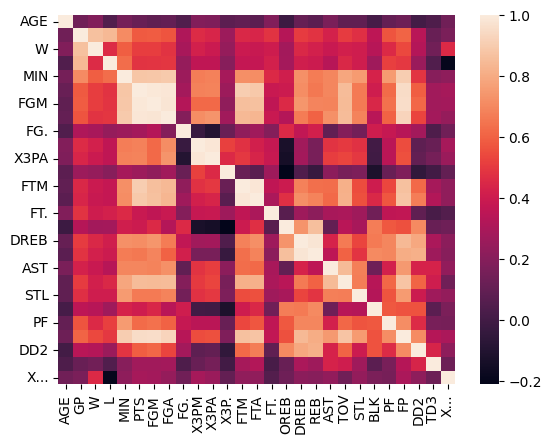

In [3]:
# Correlation between the variables
corr = nba.corr()
sns.heatmap(corr)
plt.show()

In [4]:
corr = nba.rcorr()
corr

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG.,X3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
AGE,-,**,***,,***,*,*,*,,***,...,,***,*,*,,*,**,,,**
GP,0.138,-,***,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,*,***
W,0.185,0.867,-,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,**,***
L,0.044,0.84,0.457,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,***
MIN,0.152,0.71,0.589,0.626,-,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
PTS,0.11,0.579,0.507,0.479,0.881,-,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGM,0.091,0.584,0.509,0.487,0.882,0.99,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGA,0.103,0.568,0.48,0.489,0.893,0.982,0.977,-,***,***,...,***,***,***,***,***,***,***,***,***,***
FG.,0.046,0.312,0.291,0.239,0.259,0.282,0.327,0.193,-,,...,***,*,***,***,***,***,***,***,,**
X3PM,0.187,0.457,0.419,0.359,0.67,0.68,0.617,0.715,-0.031,-,...,***,***,***,***,,***,***,,**,***


In [5]:
# Correlation between the variables with p-values (Pearson's correlation) with Bonferroni correction
corr = nba.rcorr(method = "pearson", padjust = "bonferroni")
corr

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG.,X3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
AGE,-,,**,,,,,,,**,...,,,,,,,,,,
GP,0.138,-,***,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,*
W,0.185,0.867,-,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,***
L,0.044,0.84,0.457,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,**
MIN,0.152,0.71,0.589,0.626,-,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
PTS,0.11,0.579,0.507,0.479,0.881,-,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGM,0.091,0.584,0.509,0.487,0.882,0.99,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGA,0.103,0.568,0.48,0.489,0.893,0.982,0.977,-,**,***,...,***,***,***,***,***,***,***,***,***,***
FG.,0.046,0.312,0.291,0.239,0.259,0.282,0.327,0.193,-,,...,***,,**,,***,***,***,***,,
X3PM,0.187,0.457,0.419,0.359,0.67,0.68,0.617,0.715,-0.031,-,...,,***,***,***,,***,***,,,***


In [6]:
# Correlation between the variables with p-values (Spearman's correlation) with Holm
nba.rcorr(method = "spearman", padjust = "holm")

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG.,X3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
AGE,-,*,***,,**,**,*,*,,***,...,,***,*,,,,**,,,**
GP,0.143,-,***,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
W,0.213,0.871,-,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
L,0.046,0.809,0.492,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,*
MIN,0.184,0.705,0.592,0.627,-,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
PTS,0.169,0.673,0.568,0.603,0.938,-,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGM,0.147,0.668,0.563,0.596,0.929,0.993,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGA,0.153,0.642,0.533,0.589,0.939,0.981,0.975,-,***,***,...,***,***,***,***,***,***,***,***,***,***
FG.,0.064,0.287,0.303,0.188,0.23,0.334,0.385,0.197,-,**,...,***,,***,**,***,***,***,***,,***
X3PM,0.206,0.488,0.432,0.416,0.676,0.656,0.602,0.696,-0.166,-,...,***,***,***,***,,***,***,***,**,**


- *Explain how these techniques work and what the main differences are between Holm and Bonferonni.*

Bonferonni correction works by dividing the significance level by the number of tests. Holm correction works by ordering the p-values from smallest to largest and then applying the Bonferonni correction to the first p-value. If the p-value is significant, then the corresponding hypothesis is rejected. If the p-value is not significant, then the corresponding hypothesis is not rejected and the next p-value is tested. This process is repeated until a significant p-value is found or all p-values have been tested.

- *What other correction techniques could have been used ?*

Some other correction techniques could have been used such as the Benjamini-Hochberg correction, the Sidak correction or the Skipped correction.

## 4. Market Basket Analysis

1. In the introduction of the Jupyter Notebook, define precisely the following metrics : support, lift, confidence, leverage and conviction. Plagiarism will not be tolerated, use your own words

- Support: The percentage of transactions in which a particular item or a set of items appear.
- Lift: The ratio of the observed support of a itemset to the expected support if the items were independent.
- Confidence: The probability that a customer who bought item A also bought item B. It is expressed as Confidence(A=>B) = (Support(A,B)) / Support(A).
- Leverage: The difference between the observed support of a itemset and the expected support if the items were independent.
- Conviction: The ratio of the expected probability that a item B is not bought if item A is not bought, to the actual probability that B is not bought if A is not bought. Conviction(A=>B) = 1 - (Support(B) / Support(A'=>B)).



2. Explain the notion of pruning, and how the a priori algorithm works with a chart of your own creation (i.e., not found online). Identify frequent itemsets using the apriori method (both using theses tags and retail data)

Pruning is the process of removing non-frequent itemsets from the search space. The a priori algorithm works by generating all possible itemsets of size k, then removing the non-frequent itemsets. This process is repeated until no more frequent itemsets are found.

In [7]:
thesesfr = pd.read_csv("Datasets/Market Basket Analysis/tel_samp_rec.csv", encoding="latin-1")
thesesfr

,Defence.date,Domains,Full.Text.Language,def.date,n.disc,these.id,disc1.lev1,disc1.lev2,disc1.lev3,disc2.lev1,...,n.tag,disc1.rec.lev1,disc1.rec.lev2,disc1.rec.lev3,disc2.rec.lev1,disc2.rec.lev2,disc2.rec.lev3,disc3.rec.lev1,disc3.rec.lev2,disc3.rec.lev3
0,2010/09/23,"Sciences du Vivant [q-bio] / Ecologie, Environ...",French,2010.0,1,tel-00662843v1,Sciences du Vivant [q-bio],"Ecologie, Environnement",Ecosystèmes,NaN,...,1,X,67 - Biologie des populations et écologie,"Ecologie, Environnement",NaN,NaN,NaN,NaN,NaN,NaN
1,2009/11/02,Sciences de l'Homme et Société,French,2009.0,1,tel-00491490v1,Sciences de l'Homme et Société,NaN,NaN,NaN,...,1,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996/05/30,Sciences du Vivant [q-bio] / Alimentation et N...,French,1996.0,1,tel-01776364v1,Sciences du Vivant [q-bio],Alimentation et Nutrition,NaN,Sciences du Vivant [q-bio],...,2,X,68 - Biologie des organismes,Alimentation et Nutrition,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/02/02,Informatique [cs] / Autre [cs.OH] \r\n\r\nInf...,French,2018.0,1,tel-02437294v1,Informatique [cs],Autre [cs.OH],NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN
4,2015/07/08,Informatique [cs] / Automatique \r\n\r\nInfor...,French,2015.0,1,tel-01245100v1,Informatique [cs],Automatique,NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100041,2016/06/14,Sciences de l'environnement / Milieux et Chang...,English,2016.0,1,tel-02795098v1,Sciences de l'environnement,Milieux et Changements globaux,NaN,NaN,...,1,VIII,"37 - Météorologie, océanographie physique et p...",Milieux et Changements globaux,NaN,NaN,NaN,NaN,NaN,NaN
100042,2018/12/03,Sciences du Vivant [q-bio] / Neurosciences [q-...,French,2018.0,2,tel-02918021v1,Sciences du Vivant [q-bio],Neurosciences [q-bio.NC],NaN,Sciences de l'ingénieur [physics],...,2,X,69 - Neurosciences,Neurosciences [q-bio.NC],IX,"63 - Génie électrique, électronique, photoniqu...",Electromagnétisme,NaN,NaN,NaN
100043,2017/05/24,Sciences du Vivant [q-bio] / Sciences pharmace...,French,2017.0,1,tel-02917945v1,Sciences du Vivant [q-bio],Sciences pharmaceutiques,Pharmacologie,Sciences du Vivant [q-bio],...,2,pharmacie,87 - Sciences biologiques pharmaceutiques,Sciences pharmaceutiques,X,NaN,Cancer,NaN,NaN,NaN
100044,2017/07/03,Sciences du Vivant [q-bio] / Sciences pharmace...,French,2017.0,1,tel-02918194v1,Sciences du Vivant [q-bio],Sciences pharmaceutiques,NaN,NaN,...,1,pharmacie,87 - Sciences biologiques pharmaceutiques,Sciences pharmaceutiques,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
thesesfr.columns

Index(['Defence.date', 'Domains', 'Full.Text.Language', 'def.date', 'n.disc',
       'these.id', 'disc1.lev1', 'disc1.lev2', 'disc1.lev3', 'disc2.lev1',
       'disc2.lev2', 'disc2.lev3', 'disc3.lev1', 'disc3.lev2', 'disc3.lev3',
       'n.tag', 'disc1.rec.lev1', 'disc1.rec.lev2', 'disc1.rec.lev3',
       'disc2.rec.lev1', 'disc2.rec.lev2', 'disc2.rec.lev3', 'disc3.rec.lev1',
       'disc3.rec.lev2', 'disc3.rec.lev3'],
      dtype='object')

In [9]:
thesesfr[["disc1.rec.lev1", "disc1.rec.lev2", "disc2.rec.lev1"]]

,disc1.rec.lev1,disc1.rec.lev2,disc2.rec.lev1
0,X,67 - Biologie des populations et écologie,NaN
1,IV,NaN,NaN
2,X,68 - Biologie des organismes,NaN
3,V,27 - Informatique,V
4,V,27 - Informatique,V
...,...,...,...
100041,VIII,"37 - Météorologie, océanographie physique et p...",NaN
100042,X,69 - Neurosciences,IX
100043,pharmacie,87 - Sciences biologiques pharmaceutiques,X
100044,pharmacie,87 - Sciences biologiques pharmaceutiques,NaN


In [10]:
# Apply mba on disc1.lev1 and disc1.lev2

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Prepare the dataset with itemsets as the columns and the thesis for each row
itemsets = thesesfr[["disc1.rec.lev1", "disc2.rec.lev1"]]
itemsets[["disc1.rec.lev1"]] = itemsets[["disc1.rec.lev1"]].astype(str)
itemsets[["disc2.rec.lev1"]] = itemsets[["disc2.rec.lev1"]].astype(str)

# Drop if "nan" is in the itemset
itemsets.drop(itemsets[itemsets["disc1.rec.lev1"] == "nan"].index, inplace = True)
itemsets.drop(itemsets[itemsets["disc2.rec.lev1"] == "nan"].index, inplace = True)
itemsets = itemsets.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
itemsets = pd.DataFrame(te_ary, columns=te.columns_)
itemsets

,I,I - Droit,II,III,IV,IX,V,VI,VII,VIII,X,XII,pharmacie
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16676,False,False,False,False,False,False,False,False,True,True,False,False,False
16677,False,False,False,False,False,False,True,False,False,False,False,False,False
16678,False,False,True,False,True,False,False,False,False,False,False,False,False
16679,False,False,False,False,False,True,False,False,False,False,True,False,False


In [11]:
frequent_itemsets = apriori(itemsets, min_support=0.0000005, use_colnames=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.010311,(I),1
1,0.004736,(I - Droit),1
2,0.028296,(II),1
3,0.031413,(III),1
4,0.121456,(IV),1
...,...,...,...
70,0.009172,"(VIII, X)",2
71,0.000120,"(VIII, XII)",2
72,0.000540,"(VIII, pharmacie)",2
73,0.001679,"(X, XII)",2


In [12]:
frequent_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
frequent_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I - Droit),(I),0.004736,0.010311,0.001139,0.240506,23.324919,0.001090,1.303090
1,(I),(I - Droit),0.010311,0.004736,0.001139,0.110465,23.324919,0.001090,1.118859
2,(IV),(I),0.121456,0.010311,0.007853,0.064659,6.270837,0.006601,1.058105
3,(I),(IV),0.010311,0.121456,0.007853,0.761628,6.270837,0.006601,3.685601
4,(I - Droit),(II),0.004736,0.028296,0.000659,0.139241,4.920913,0.000525,1.128892
5,(I - Droit),(IV),0.004736,0.121456,0.002218,0.468354,3.856180,0.001643,1.652500
6,(I - Droit),(XII),0.004736,0.039146,0.000240,0.050633,1.293427,0.000054,1.012099
7,(IV),(II),0.121456,0.028296,0.011930,0.098223,3.471313,0.008493,1.077544
8,(II),(IV),0.028296,0.121456,0.011930,0.421610,3.471313,0.008493,1.518949
9,(II),(IX),0.028296,0.333613,0.002758,0.097458,0.292128,-0.006682,0.738344


3. Create visualizations of association rules with plotly when possible. You can find interactive plotly graphs, in the MBA dataset folder, and R codes to produce interactive graphs at this address. You should produce, among other graphs, support / lift scatterplots, parallel plots, and heatmaps.

In [13]:
frequent_association_rules.antecedents = frequent_association_rules.antecedents.apply(lambda x: ', '.join(list(x))).astype("unicode")
frequent_association_rules.consequents = frequent_association_rules.consequents.apply(lambda x: ', '.join(list(x))).astype("unicode")

In [14]:
px.scatter(frequent_association_rules, x="support", y="confidence", color="lift", size="lift", hover_data=["antecedents", "consequents"])

/usr/local/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [15]:
# Parallel plot of antecedents and consequents
px.parallel_categories(frequent_association_rules, dimensions=["antecedents", "consequents"], color="support", color_continuous_scale=px.colors.sequential.Inferno)

/usr/local/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [16]:
# Make a heatmap of the results
px.density_heatmap(frequent_association_rules, x="antecedents", y="consequents", z="support")

/usr/local/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



What are the insights that you get from such visualizations ? Elaborate with a 5 to 10 lines long paragraph

The insights that I get from such visualizations are that there are some correlations that seem more important than each other. The link between category V and IX seem very strong. Probably because those two categories are Mathematiques and Informatiques. Unfortunately, a lot of the results are quite obvious like this one. 

## 5. Exploring sequential data

### 5.2 Simple motif extraction with the n-gram approach

In [17]:
# load the tinder dataset
tinderDf = pd.read_csv("Datasets/Sequential Data - Tinder messages/messages.db.csv")
tinderMessages = tinderDf.groupby("conversationid").apply(lambda x: x["message.type"].tolist()).to_list()
tinderDf

,conversationid,user1,user2,rank,inverse.rank,timestamp,mess.sentim,message.id,message.type,sender.id,reader.id,N.words
0,1,1,2759.0,1,14,17320,3,1,aff.nor,1.0,2759.0,41
1,1,1,2759.0,2,13,17320,1,2,chunk,2759.0,1.0,43
2,1,1,2759.0,3,12,17320,-3,3,aff.nor,2759.0,1.0,26
3,1,1,2759.0,4,11,17320,-2,4,questn,2759.0,1.0,2
4,1,1,2759.0,5,10,17320,-1,5,aff.nor,1.0,2759.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
388403,25048,1500,2314.0,6,5,17199,-3,388404,aff.nor,2314.0,1500.0,18
388404,25048,1500,2314.0,7,4,17200,2,388405,aff.nor,1500.0,2314.0,37
388405,25048,1500,2314.0,8,3,17201,2,388406,aff.nor,2314.0,1500.0,9
388406,25048,1500,2314.0,9,2,17201,-3,388407,chunk,2314.0,1500.0,49


In [18]:
# Compute the trigrams for tinderMessages
from nltk.util import ngrams
tinderTrigrams = [list(ngrams(message, 3)) for message in tinderMessages]
tinderTrigrams

# Count the trigrams and put the result in a dataframe
from collections import Counter
tinderTrigramsCount = Counter([trigram for message in tinderTrigrams for trigram in message])
tinderTrigramsCountDf = pd.DataFrame.from_dict(tinderTrigramsCount, orient="index").reset_index().sort_values(by=0, ascending=False)
tinderTrigramsCountDf.columns = ["trigram", "count"]
# Add percentage
tinderTrigramsCountDf["percentage"] = tinderTrigramsCountDf["count"] / tinderTrigramsCountDf["count"].sum() * 100
tinderTrigramsCountDf

,trigram,count,percentage
5,"(aff.nor, aff.nor, aff.nor)",77124,22.795091
13,"(aff.nor, aff.nor, questn)",26759,7.909002
4,"(questn, aff.nor, aff.nor)",25593,7.564374
2,"(aff.nor, questn, aff.nor)",25529,7.545458
6,"(aff.nor, aff.nor, chunk)",15345,4.535432
...,...,...,...
114,"(chunk, piss.off, aff.off)",6,0.001773
112,"(piss.off, chunk, phone)",5,0.001478
117,"(piss.off, piss.off, end)",5,0.001478
115,"(piss.off, piss.off, phone)",2,0.000591


In [19]:
# load the loan dataset
loanDf = pd.read_csv("Datasets/ngram - WINEPI - MINEPI datasets/Artificial - Loan Process.csv")
loanDf

,case,event,completeTime
0,trace 0,register application,2013-04-16 10:08:02
1,trace 0,check credit,2013-04-16 10:16:03
2,trace 0,calculate capacity,2013-04-16 10:16:28
3,trace 0,check system,2013-04-16 10:20:25
4,trace 0,accept,2013-04-16 10:21:30
...,...,...,...
585,trace 99,register application,2013-04-16 18:30:02
586,trace 99,calculate capacity,2013-04-16 18:39:07
587,trace 99,check credit,2013-04-16 18:48:13
588,trace 99,reject,2013-04-16 18:50:59


In [20]:
tracesDf = loanDf.groupby("case").apply(lambda x: x["event"].tolist()).to_list()

In [21]:
# Compute the trigrams for loanDf
loanTrigrams = [list(ngrams(event, 3)) for event in tracesDf]
loanTrigrams

# Count the trigrams and put the result in a dataframe
loanTrigramsCount = Counter([trigram for message in loanTrigrams for trigram in message])
loanTrigramsCountDf = pd.DataFrame.from_dict(loanTrigramsCount, orient="index").reset_index().sort_values(by=0, ascending=False)
loanTrigramsCountDf.columns = ["trigram", "count"]
# Add percentage
loanTrigramsCountDf["percentage"] = loanTrigramsCountDf["count"] / loanTrigramsCountDf["count"].sum() * 100
loanTrigramsCountDf

,trigram,count,percentage
0,"(register application, check credit, calculate...",52,13.333333
1,"(check credit, calculate capacity, check system)",44,11.282051
4,"(calculate capacity, check system, reject)",38,9.743590
5,"(check system, reject, send decision e-mail)",38,9.743590
6,"(register application, check credit, check sys...",38,9.743590
7,"(check credit, check system, calculate capacity)",38,9.743590
11,"(calculate capacity, reject, send decision e-m...",35,8.974359
10,"(check system, calculate capacity, reject)",26,6.666667
9,"(calculate capacity, accept, send decision e-m...",13,3.333333
8,"(check system, calculate capacity, accept)",12,3.076923


Those frequents motifs appear in the datasets because they are often repeated by different users.

## 6. Sequential Pattern Mining

1. In around 10 to 20 lines, explain the main differences between GSP, SPADE and Prefixspan algorithms.

GSP (Generalized Sequential Pattern) algorithm is a pattern discovery technique that discovers all frequent patterns of a database. It uses an apriori-based approach, where it generates candidate patterns and then checks their support. However, it has limitations in handling constraints, such as minimum gap between patterns.

SPADE (Sequential Pattern Discovery with Donors) algorithm is an improved version of GSP that can handle large datasets with high speed and low memory usage. It uses a different approach called the "transaction reduction technique" to reduce the number of transactions needed to be considered in the analysis.

Prefixspan algorithm is a pattern discovery technique that is based on the concept of a prefix tree, also known as a suffix tree. It focuses on finding patterns that start with a particular sequence and then extends it with other sequences. Unlike GSP and SPADE, Prefixspan does not require any database scanning and can handle patterns with gaps.

In summary, GSP and SPADE are both apriori-based algorithms that discover all frequent patterns in a database, while Prefixspan is a prefix tree-based algorithm that finds patterns that start with a specific sequence. SPADE is a more efficient version of GSP, while Prefixspan is optimized for handling patterns with gaps.

2. Apply both GSP and Prefixspan algorithms from the two different Github sources, and play with the parameters (min support, etc.). Display some relevant results. You should reach minsupport=8000 at some point, for GSP.

In [22]:
messageTransactions = pd.read_csv("Datasets/Sequential Data - Tinder messages/messages.db.transaction.csv", header=None)
messageTransactions = messageTransactions[0].astype(str)
messageTransactions = messageTransactions.str.split("").to_list()
messageTransactions = [message[1:-1] for message in messageTransactions]

In [23]:
from prefixspan.api import PrefixSpan

# Compute the frequent patterns for the tinder messages dataset
ps = PrefixSpan(messageTransactions)

In [24]:
pd.DataFrame(ps.frequent(8000), columns=["Count", "Transactions"]).sort_values(by="Count", ascending=False)

,Count,Transactions
0,24574,[A]
25,23691,"[A, A]"
283,22855,[C]
66,22476,"[A, A, A]"
178,21656,"[A, C]"
...,...,...
115,8060,"[A, A, A, A, A, B, C]"
370,8058,"[C, C, C, A, D]"
64,8011,"[A, A, C, B, B]"
329,8008,"[C, A, A, B, B]"


In [25]:
psLabels = PrefixSpan(tinderMessages)
pd.DataFrame(psLabels.frequent(8000), columns=["Count", "Transactions"]).sort_values(by="Count", ascending=False)

,Count,Transactions
0,24574,[aff.nor]
25,23691,"[aff.nor, aff.nor]"
283,22855,[questn]
66,22476,"[aff.nor, aff.nor, aff.nor]"
178,21656,"[aff.nor, questn]"
...,...,...
115,8060,"[aff.nor, aff.nor, aff.nor, aff.nor, aff.nor, ..."
370,8058,"[questn, questn, questn, aff.nor, end]"
64,8011,"[aff.nor, aff.nor, questn, chunk, chunk]"
329,8008,"[questn, aff.nor, aff.nor, chunk, chunk]"


In [26]:
pd.DataFrame(psLabels.topk(3), columns=["Count", "Transactions"])

,Count,Transactions
0,24574,[aff.nor]
1,23691,"[aff.nor, aff.nor]"
2,22855,[questn]


In [27]:
from gsppy.gsp import GSP

# Compute the frequent patterns for the tinder messages dataset
gsp = GSP(tinderMessages)
gspResults = gsp.search(0.3)

In [28]:
GSPResults = pd.DataFrame(gspResults).transpose()
GSPResults["Result"] = [[item for item in value if not pd.isna(item)][0] for value in pd.DataFrame(gspResults).transpose().values.tolist()]
GSPResults.drop(columns=[0, 1, 2, 3, 4], inplace=True)
GSPResults.reset_index(inplace=True)
GSPResults

,index,Result
0,"(aff.nor,)",24574.0
1,"(chunk,)",19556.0
2,"(questn,)",22855.0
3,"(end,)",19630.0
4,"(piss.off,)",7541.0
5,"(aff.nor, aff.nor)",22818.0
6,"(aff.nor, chunk)",15794.0
7,"(aff.nor, questn)",20046.0
8,"(chunk, aff.nor)",13857.0
9,"(chunk, chunk)",8574.0


3. Results differ significantly between Prefixspan and GSP. Are such differences expected ? What could be the causes underlying such differences ?

The results differ significantly between Prefixspan and GSP because they use different algorithms. GSP uses an apriori-based approach, while Prefixspan uses a prefix tree-based approach. The apriori-based approach is more efficient for finding frequent patterns, while the prefix tree-based approach is more efficient for finding patterns with gaps.

## 7. Episode Mining

1. Explain the difference between a serial, a parallel episode, non serial non parallel episode involving three different events

In episode mining, the distinction between a serial episode, a parallel episode, and a non-serial non-parallel episode is based on the relationship between the events involved.

A serial episode involves a sequence of events that occur one after the other, where the order of the events is important. For example, consider the following events: A -> B -> C. Here, event A must occur before event B, and event B must occur before event C. This forms a serial episode as the events occur in a specific order.

A parallel episode, on the other hand, involves multiple events that occur simultaneously. For example, consider the following events: A && B && C. Here, all three events occur at the same time and there is no specific order of occurrence.

A non-serial non-parallel episode is one in which the events are not sequential, nor do they occur simultaneously. For example, consider the following events: A -> B && C. Here, event A occurs first and then events B and C occur simultaneously. The events are not sequential nor do they occur simultaneously.

In conclusion, the distinction between serial, parallel, and non-serial non-parallel episodes depends on the relationship between the events involved and whether they occur in a specific order or not, or whether they occur simultaneously or not.

2. Explain the differences between the MINEPI and the WINEPI algorithm

MINEPI and WINEPI are two algorithms used in episode mining, which is the process of finding patterns of events in a sequence. The main difference between these two algorithms lies in the way they handle episodes and their computational complexity.

MINEPI (Mining Episodes by Pattern Inspection) is an efficient episode mining algorithm that uses a divide-and-conquer approach to identify frequent episodes. It is based on the Apriori algorithm and uses a bottom-up approach to find frequent episodes by iteratively combining events. MINEPI has a low time complexity and can handle large datasets efficiently, making it suitable for real-world applications.

WINEPI (Weighted Episode Discovery) is a weighted episode mining algorithm that focuses on discovering high-quality episodes, which are sequences of events that are both frequent and have high weights. Unlike MINEPI, WINEPI takes into account the weights assigned to each event, which can represent the importance or relevance of the event. WINEPI uses a top-down approach to find episodes by decomposing the sequence into smaller sub-sequences and analyzing each sub-sequence separately. WINEPI is a more sophisticated algorithm than MINEPI, but its time complexity is higher, making it less suitable for large datasets.

In conclusion, MINEPI is a fast and efficient algorithm for episode mining, while WINEPI is a more advanced algorithm that considers the weights of events and discovers high-quality episodes. The choice between these two algorithms will depend on the specific requirements of the episode mining task, such as the size of the dataset, the importance of the weights of the events, and the desired computational complexity.

3. Apply them to find significant episodes in the loan process dataset that we provided in the WINEPI/MINEPI datasets. Present some relevant results

In [67]:
loanDf = pd.read_csv("Datasets/ngram - WINEPI - MINEPI datasets/Artificial - Loan Process.csv")
loanDf

,case,event,completeTime
0,trace 0,register application,2013-04-16 10:08:02
1,trace 0,check credit,2013-04-16 10:16:03
2,trace 0,calculate capacity,2013-04-16 10:16:28
3,trace 0,check system,2013-04-16 10:20:25
4,trace 0,accept,2013-04-16 10:21:30
...,...,...,...
585,trace 99,register application,2013-04-16 18:30:02
586,trace 99,calculate capacity,2013-04-16 18:39:07
587,trace 99,check credit,2013-04-16 18:48:13
588,trace 99,reject,2013-04-16 18:50:59


In [154]:
loanSequences = loanDf.drop("case", axis=1).set_index("completeTime").sort_index().reset_index().event.values.tolist()
loanSequences = list(zip(range(len(loanSequences)), loanSequences))
loanSequences = sorted(loanSequences, key=lambda x: x[0])
loanSequences

[(0, 'register application'),
 (1, 'register application'),
 (2, 'register application'),
 (3, 'check credit'),
 (4, 'check credit'),
 (5, 'calculate capacity'),
 (6, 'calculate capacity'),
 (7, 'register application'),
 (8, 'check system'),
 (9, 'check system'),
 (10, 'accept'),
 (11, 'check credit'),
 (12, 'check credit'),
 (13, 'calculate capacity'),
 (14, 'accept'),
 (15, 'send decision e-mail'),
 (16, 'calculate capacity'),
 (17, 'register application'),
 (18, 'check system'),
 (19, 'send decision e-mail'),
 (20, 'check credit'),
 (21, 'register application'),
 (22, 'check system'),
 (23, 'register application'),
 (24, 'check credit'),
 (25, 'calculate capacity'),
 (26, 'accept'),
 (27, 'register application'),
 (28, 'calculate capacity'),
 (29, 'check system'),
 (30, 'check credit'),
 (31, 'check credit'),
 (32, 'calculate capacity'),
 (33, 'accept'),
 (34, 'calculate capacity'),
 (35, 'check system'),
 (36, 'send decision e-mail'),
 (37, 'accept'),
 (38, 'send decision e-mail'),

In [159]:
from sklearn.preprocessing import LabelEncoder

# Encode the loan sequences
le = LabelEncoder()
loanEncoded = [str(x) for x in le.fit_transform([item[1] for item in loanSequences])]
loanEncoded = list(zip(range(len(loanEncoded)), loanEncoded))
loanEncoded = sorted(loanEncoded, key=lambda x: x[0])
loanEncoded

[(0, '4'),
 (1, '4'),
 (2, '4'),
 (3, '2'),
 (4, '2'),
 (5, '1'),
 (6, '1'),
 (7, '4'),
 (8, '3'),
 (9, '3'),
 (10, '0'),
 (11, '2'),
 (12, '2'),
 (13, '1'),
 (14, '0'),
 (15, '6'),
 (16, '1'),
 (17, '4'),
 (18, '3'),
 (19, '6'),
 (20, '2'),
 (21, '4'),
 (22, '3'),
 (23, '4'),
 (24, '2'),
 (25, '1'),
 (26, '0'),
 (27, '4'),
 (28, '1'),
 (29, '3'),
 (30, '2'),
 (31, '2'),
 (32, '1'),
 (33, '0'),
 (34, '1'),
 (35, '3'),
 (36, '6'),
 (37, '0'),
 (38, '6'),
 (39, '0'),
 (40, '3'),
 (41, '4'),
 (42, '4'),
 (43, '6'),
 (44, '4'),
 (45, '6'),
 (46, '4'),
 (47, '5'),
 (48, '2'),
 (49, '3'),
 (50, '1'),
 (51, '2'),
 (52, '2'),
 (53, '4'),
 (54, '5'),
 (55, '1'),
 (56, '3'),
 (57, '6'),
 (58, '3'),
 (59, '2'),
 (60, '2'),
 (61, '5'),
 (62, '4'),
 (63, '1'),
 (64, '6'),
 (65, '6'),
 (66, '1'),
 (67, '4'),
 (68, '2'),
 (69, '5'),
 (70, '2'),
 (71, '1'),
 (72, '6'),
 (73, '4'),
 (74, '1'),
 (75, '3'),
 (76, '3'),
 (77, '3'),
 (78, '2'),
 (79, '3'),
 (80, '1'),
 (81, '3'),
 (82, '1'),
 (83, '3'),
 (

In [148]:
from episode_mining.winepi import WINEPI, WinEpiRules
wine = WINEPI(loanSequences, episode_type="serial")
freqItems, suppData = wine.WinEpi(width=5, step=1, minFrequent=0.1)

In [150]:
winepiRules = WinEpiRules(freqItems, suppData, width=5, minConfidence=0.1)
ruleList = winepiRules.generateRules()
winepiRules.printRules(ruleList)

WINEPIRule: ['reject'] ==> ['reject', 'register application'] [5] [0.19528619528619529, 0.36942675159235666]
WINEPIRule: ['register application'] ==> ['reject', 'register application'] [5] [0.19528619528619529, 0.2951653944020356]
WINEPIRule: ['check system'] ==> ['check system', 'reject'] [5] [0.16666666666666666, 0.28779069767441856]
WINEPIRule: ['reject'] ==> ['check system', 'reject'] [5] [0.16666666666666666, 0.31528662420382164]
WINEPIRule: ['reject'] ==> ['reject', 'send decision e-mail'] [5] [0.22053872053872053, 0.4171974522292993]
WINEPIRule: ['send decision e-mail'] ==> ['reject', 'send decision e-mail'] [5] [0.22053872053872053, 0.35792349726775957]
WINEPIRule: ['check credit'] ==> ['check credit', 'reject'] [5] [0.19023569023569023, 0.28535353535353536]
WINEPIRule: ['reject'] ==> ['check credit', 'reject'] [5] [0.19023569023569023, 0.35987261146496813]
WINEPIRule: ['calculate capacity'] ==> ['calculate capacity', 'reject'] [5] [0.19023569023569023, 0.3087431693989071]
WINE

In [166]:
le.classes_.tolist()

['accept',
 'calculate capacity',
 'check credit',
 'check system',
 'register application',
 'reject',
 'send decision e-mail']

In [167]:
from episode_mining.minepi import MINEPI, MinEpiRules
alg = MINEPI(loanEncoded, episode_type='serial')
freqEpisodes = alg.MinEpi(max_width=40, step=10, minFrequent=1)

In [168]:
minepiRules = MinEpiRules(freqEpisodes, max_width=40, step=10, minConfidence=0.75)
ruleList = minepiRules.generateRules()
minepiRules.printRules(ruleList)

MINEPIRule: ['0'] [10] ==> ['0', '1'] [30] [12, 0.95]
MINEPIRule: ['0'] [20] ==> ['0', '1'] [30] [12, 0.95]
MINEPIRule: ['0'] [30] ==> ['0', '1'] [30] [12, 0.95]
MINEPIRule: ['0'] [40] ==> ['0', '1'] [30] [12, 0.95]
MINEPIRule: ['0'] [10] ==> ['0', '1'] [40] [12, 1.0]
MINEPIRule: ['0'] [20] ==> ['0', '1'] [40] [12, 1.0]
MINEPIRule: ['0'] [30] ==> ['0', '1'] [40] [12, 1.0]
MINEPIRule: ['0'] [40] ==> ['0', '1'] [40] [12, 1.0]
MINEPIRule: ['0'] [10] ==> ['0', '2'] [30] [13, 0.9]
MINEPIRule: ['0'] [20] ==> ['0', '2'] [30] [13, 0.9]
MINEPIRule: ['0'] [30] ==> ['0', '2'] [30] [13, 0.9]
MINEPIRule: ['0'] [40] ==> ['0', '2'] [30] [13, 0.9]
MINEPIRule: ['0'] [10] ==> ['0', '2'] [40] [14, 1.0]
MINEPIRule: ['0'] [20] ==> ['0', '2'] [40] [14, 1.0]
MINEPIRule: ['0'] [30] ==> ['0', '2'] [40] [14, 1.0]
MINEPIRule: ['0'] [40] ==> ['0', '2'] [40] [14, 1.0]
MINEPIRule: ['0'] [10] ==> ['0', '3'] [30] [16, 1.0]
MINEPIRule: ['0'] [20] ==> ['0', '3'] [30] [16, 1.0]
MINEPIRule: ['0'] [30] ==> ['0', '3'] [30]

### 5.4 Generating sequences with patterns

In [201]:
import numpy as np
import random
import scipy.stats as stats

np.random.seed(42)
random.seed(42)

def generate_sequence(length, pattern, prob_dist, pattern_occurrence_prob):
    sequence = []
    for i in range(length):
        if random.uniform(0, 1) > pattern_occurrence_prob:
            sequence.append(np.random.choice(np.arange(100), p=prob_dist))
        else:
            sequence.extend(pattern)
            i += len(pattern) - 1
    return sequence

prob_dist = stats.norm.pdf(np.arange(100), 5, 2)
prob_dist /= prob_dist.sum()

generate_sequence(100, [1, 2, 3, 4, 5, 5, 5, 5], prob_dist, 0.1)

[4,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 8,
 6,
 6,
 3,
 3,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 2,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 7,
 6,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 6,
 1,
 9,
 7,
 3,
 3,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 3,
 4,
 5,
 5,
 4,
 6,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 3,
 4,
 4,
 5,
 7,
 3,
 5,
 5,
 2,
 6,
 3,
 2,
 8,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 9,
 7,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 4,
 2,
 6,
 5,
 3,
 5,
 1,
 8,
 4,
 6,
 4,
 5,
 5,
 3,
 9,
 6,
 8,
 7,
 5,
 8,
 2,
 3,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 2,
 4,
 4,
 4,
 7,
 4,
 4,
 5,
 3,
 7,
 2,
 9,
 6,
 3,
 0,
 7,
 6,
 6,
 6,
 2,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 4,
 3,
 7,
 6,
 1,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 4,
 2,
 4,
 4,
 6]

## 9. Spatial Associations